<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Import Libraries 🔖 </h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id ='1' ></a>
<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Load and Check Data 🗸 </h2>

In [ ]:
data = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")


In [ ]:
#Let's examine a few examples from our data.
data.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [ ]:
print("Data Shape -->", data.shape)

Data Shape --> (3650, 2)


In [ ]:
data.describe()

,Date,Daily minimum temperatures
count,3650,3650
unique,3650,230
top,1/1/1981,11
freq,1,51


In [ ]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date                          0
Daily minimum temperatures    0
dtype: int64


<a id ='13' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Split the data as train and test ❓</h3>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >In this section, we will separate the data we have as a train and test. </p> </li>
</ul>

In [ ]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [ ]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  2920
total length of data -->  3650
Train length -->  2920
Test length -->  730


In [ ]:
# the part of data that we will use as training.
train_df = data.loc[0:training_size, ["Daily minimum temperatures"]] # Create a view for the desired column(s)

#train = train.loc[:, ["Daily minimum temperatures"]].values # removed as it is the source of the error
# The above line is unnecessary with the view created above

# Convert all values in the 'Daily minimum temperatures' column to numeric,
# replacing invalid values with NaN
import pandas as pd
import numpy as np

train = pd.to_numeric(train_df.iloc[:, 0], errors='coerce').values.reshape(-1, 1)
#iloc[] is used to access data in the train_df view

# Replace NaN with a suitable value (e.g., mean or median)
# You can also choose to drop rows with NaN if appropriate
train = np.nan_to_num(train, nan=np.nanmean(train))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (2881, 40, 1)
y_train shape -->  (2881,)


<a id ='21' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Create Model</h3>



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
epochs = 100
batch_size = 20

<a id ='24' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Fit the model </h3>


In [ ]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.4027
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1610
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1022
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0619
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0377
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0279
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226
Epoch 9/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0206
Epoch 10/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0194
Epoch 11/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0161
Epoch 12/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0157
Epoch 13/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0179
Epoch 14/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0152
Epoch 15/100
145/145 ━━━━━━━

In [ ]:
test.head()

,Date,Daily minimum temperatures
2920,1/1/1989,14.3
2921,1/2/1989,17.4
2922,1/3/1989,18.5
2923,1/4/1989,16.8
2924,1/5/1989,11.5


In [ ]:
temp = test.loc[:, ["Daily minimum temperatures"]].values
print("Temperature Variations", temp.shape)

Temperature Variations (730, 1)


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Since we use the "open" feature while training the model, we will use the same feature while testing. </p> </li>
</ul>

In [ ]:
dataset_total = pd.concat((data["Daily minimum temperatures"], test["Daily minimum temperatures"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (372, 40)


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Finally, we trained our model according to the steps above. We generate our test data based on this number of steps. </p> </li>
</ul>

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We can now make an estimate here as data is ready to predict. </p> </li>
        <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >inverse_transform --> If you remember before training our model, we normalized our data. converts these values ​​to before normalization. </p> </li>
</ul>

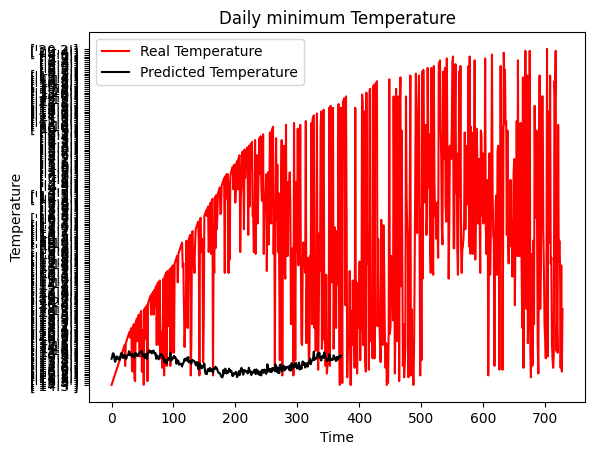

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

temp_str = [str(x) for x in temp]


plt.plot(temp_str, color="red", label="Real Temperature") #Or plt.plot(temp_num, ...)
plt.plot(predict, color="black", label="Predicted Temperature")
plt.title("Daily minimum Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Our model has made good predictions until a certain time, but after a while the difference with the real data has started to increase. </p> </li>

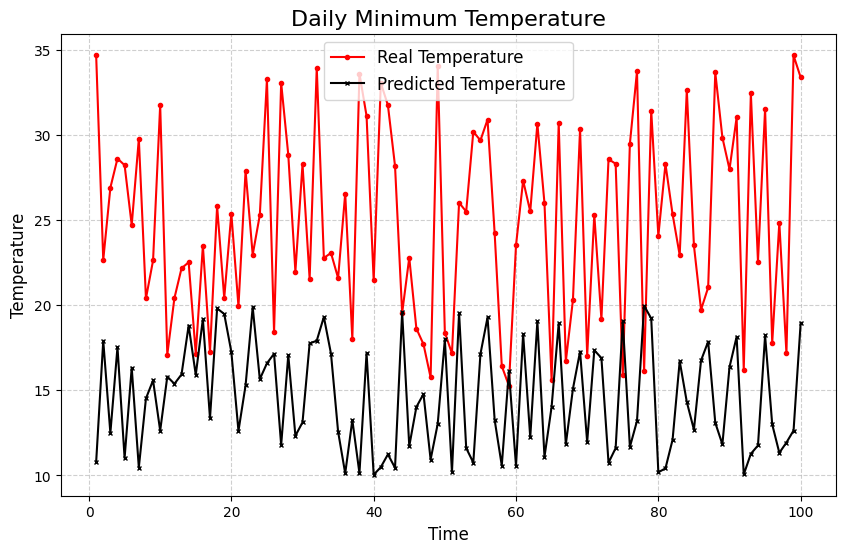

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

temp = np.linspace(1, 100, 100)
predict = np.random.rand(100) * 10 + 10
real_temp = np.random.rand(100) * 20 + 15

plt.figure(figsize=(10, 6))

# Plot with reduced line thickness and markers
plt.plot(temp, real_temp, color="red", linewidth=1.5, marker='o', markersize=3, label="Real Temperature")
plt.plot(temp, predict, color="black", linewidth=1.5, marker='x', markersize=3, label="Predicted Temperature")

# Title and labels with increased font size
plt.title("Daily Minimum Temperature", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature", fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

plt.show()
